In [153]:
from langchain_groq import ChatGroq 

llm= ChatGroq(
    model="deepseek-r1-distill-llama-70b",
    temperature=0
)

response= llm.invoke("Hi")
print(response.content)

<think>

</think>

Hello! How can I assist you today? 😊


In [154]:
response= llm.invoke("what is length of wall of china?")

In [155]:
print(response.content)

<think>
Okay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.

First, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.

I should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.

Wait, I think they used advanced technology like GPS and satellites to measure it more accurately. That would make

#### This is my custom tools

In [17]:
from langchain.tools import tool

In [25]:
@tool 
def multiply(a:int, b:int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a:int, b:int) -> int:
    """ 
     Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a:int, b:int) -> float:
    """ 
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b==0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

Importing the inbuilt tool

In [37]:
# !pip install duckduckgo_search

In [33]:
from langchain_community.tools import DuckDuckGoSearchRun

search= DuckDuckGoSearchRun()

In [36]:
search.invoke("Hi")

'Learn how to greet people in different situations with various expressions, from formal to funny. Discover the origin, meaning and usage of the word "hi" and its alternatives in English. The HI Guys: Steezy & Pu\'unui; Meilin; Pu\'unui; Shannon Scott; Phat Joe; Dr. Roots; MUSIC. Listen Live; Recently Played; Request a Song; Submit Music; FEATURES. Hawaii Matters; Be Hurricane Ready; Career Link Oahu; Galleries; Hawaii Home Experts; Storm Center; What A Deal Wednesday; Contest. Hi93\'s Listen and Chill; It\'s our 2025 ... Hey, howdy, hi! How is it going? What\'s kicking, little chicken? Howdy-doody! Tell me what\'s new! Hey there, freshman! Wassup? (While at high school or university). My name is (your name), and I think we can be great friends! Hi, mister! What is going on? I come in peace! Chow chow. Ahoy, matey! Hiya! Hi! Hello, governor! Top of the morning ... 36 Ways to Say Hello | Context & Examples. Published on June 13, 2025 by Kate Santoro, BS There are many ways to say hello 

In [35]:
search.invoke("what is the latest update on iphone17 release?")

"Some iPhone 17 models (maybe even all of them) will have a new camera bump, a wide rectangular raised area that stretches across the phone similar in style to Google's Pixel line. According to a ... Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We're still in the middle of the iPhone 16 release cycle, but ... The iPhone 17 is already shaping up to be one of its biggest updates in years. From the ultra-slim iPhone 17 Air to a new matte finish, upgraded front cameras, a possible sky blue model and more ... • The iPhone 17's display may not match what the Pro model offers. • iOS 26, Apple's iPhone software update for later this year, got a preview at WWDC. • The iPhone 17 could support a new ... The iPhone 17 lineup brings significant technological improvements across design, performance, and functionality. Apple's latest innovations focus on enhanced displays, powerful processing capabilities, and adv

In [38]:
tools= [multiply, add, divide, search]

In [39]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000026AA9F88C20>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000026AA9F885E0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000026AA9F88CC0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [40]:
# Binding tools with llm

llm.bind_tools(tools)

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000026AA5725A70>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000026AA57263F0>, model_name='deepseek-r1-distill-llama-70b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add', 'description': 'Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 

In [41]:
llm_with_tools= llm.bind_tools(tools)

In [44]:
llm_with_tools.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 392, 'total_tokens': 456, 'completion_time': 0.356160807, 'prompt_time': 0.025281554, 'queue_time': 0.057922985999999996, 'total_time': 0.381442361}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--e9ccc521-b932-4ce5-b798-564c285830cc-0', usage_metadata={'input_tokens': 392, 'output_tokens': 64, 'total_tokens': 456})

In [45]:
response= llm_with_tools.invoke("Hi")

In [46]:
response.content

'Hello! How can I assist you today?'

In [47]:
response.tool_calls

[]

In [48]:
llm_with_tools.invoke("what is 2+2?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rn6p7gh5j', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 164, 'prompt_tokens': 398, 'total_tokens': 562, 'completion_time': 0.651534903, 'prompt_time': 0.025637578, 'queue_time': 0.053987961999999994, 'total_time': 0.677172481}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3e771e56-628c-41b3-a779-c5c4b72edb22-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'rn6p7gh5j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 398, 'output_tokens': 164, 'total_tokens': 562})

In [49]:
response= llm_with_tools.invoke("what is 2+2?")

In [50]:
response.content

''

In [51]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'xa622dfwk',
  'type': 'tool_call'}]

In [54]:
response= llm_with_tools.invoke("what is 10/2?")

In [55]:
response.content

''

In [56]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': 'rwfbfgycr',
  'type': 'tool_call'}]

In [57]:
response= llm_with_tools.invoke("what is a current age of the TATA Group?")

In [58]:
response.content

''

In [59]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': 'b8whp6ny9',
  'type': 'tool_call'}]

In [60]:
response= llm_with_tools.invoke("Hi")

In [62]:
response.content

'Hello! How can I assist you today?'

In [61]:
response.tool_calls

[]

In [63]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [68]:
SYSTEM_PROMPT= "You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [67]:
user_query= ["tell me what is 2+2"]

In [70]:
[SYSTEM_PROMPT] + user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [138]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.messages import HumanMessage, SystemMessage 

In [156]:
def function_1(state: MessagesState):
    user_question= state["messages"]
    input_question= [SYSTEM_PROMPT] + user_question
    response= llm_with_tools.invoke(input_question)
    return {
        "messages": [response]
    }

In [157]:
builder= StateGraph(MessagesState)

In [158]:
builder.add_node("llm_decision_step", function_1)

In [159]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000026AA9F88C20>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000026AA9F885E0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000026AA9F88CC0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [160]:
from langgraph.prebuilt import ToolNode 

builder.add_node("tools", ToolNode(tools))

In [161]:
builder.add_edge(START, "llm_decision_step")

In [162]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
        "llm_decision_step",
        tools_condition
)

In [163]:
builder.add_edge("tools", "llm_decision_step")

In [164]:
react_graph= builder.compile()

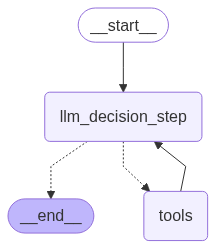

In [165]:
from IPython.display import Image, display

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [193]:
state= {"messages": ["What is 2*2"]}
state

{'messages': ['What is 2*2']}

In [194]:
state["messages"]

['What is 2*2']

In [195]:
react_graph.invoke({"messages": ["What is 2*2"]})

{'messages': [HumanMessage(content='What is 2*2', additional_kwargs={}, response_metadata={}, id='8909c26e-3f14-429e-8cf7-bcf1a035c794'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '6ympzyyhr', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 304, 'prompt_tokens': 416, 'total_tokens': 720, 'completion_time': 1.26146018, 'prompt_time': 0.033245225, 'queue_time': 0.05597271499999999, 'total_time': 1.294705405}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c1e15782-1c81-4288-8704-a10f7246f31e-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 2}, 'id': '6ympzyyhr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 416, 'output_tokens': 304, 'total_tokens': 720}),
  ToolMessage(content='4', name='multiply', id='05126626-de8f-40df-9d26-87927231d82c', tool_call_id='6

In [196]:
response= react_graph.invoke({"messages": ["What is 2*2"]})

In [200]:
response 

{'messages': [HumanMessage(content='What is 2*2', additional_kwargs={}, response_metadata={}, id='0dbe23a6-b663-433b-a624-da3bfe64fa73'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '7c31xa8pv', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 304, 'prompt_tokens': 416, 'total_tokens': 720, 'completion_time': 1.2735560559999999, 'prompt_time': 0.026725721, 'queue_time': 0.055850541, 'total_time': 1.300281777}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0d670421-5b45-49b3-9595-3ed2387f5f16-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 2}, 'id': '7c31xa8pv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 416, 'output_tokens': 304, 'total_tokens': 720}),
  ToolMessage(content='4', name='multiply', id='fc8c0d63-5419-4c46-b37d-81eaa6b59b59', tool_call_id='7

In [201]:
response["messages"][0]

HumanMessage(content='What is 2*2', additional_kwargs={}, response_metadata={}, id='0dbe23a6-b663-433b-a624-da3bfe64fa73')

In [202]:
for msg in response["messages"]:
    print(msg)

content='What is 2*2' additional_kwargs={} response_metadata={} id='0dbe23a6-b663-433b-a624-da3bfe64fa73'
content='' additional_kwargs={'tool_calls': [{'id': '7c31xa8pv', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'multiply'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 304, 'prompt_tokens': 416, 'total_tokens': 720, 'completion_time': 1.2735560559999999, 'prompt_time': 0.026725721, 'queue_time': 0.055850541, 'total_time': 1.300281777}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--0d670421-5b45-49b3-9595-3ed2387f5f16-0' tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 2}, 'id': '7c31xa8pv', 'type': 'tool_call'}] usage_metadata={'input_tokens': 416, 'output_tokens': 304, 'total_tokens': 720}
content='4' name='multiply' id='fc8c0d63-5419-4c46-b37d-81eaa6b59b59' tool_call_id='7c31xa8pv'
content='The result of multiplying 2 and 2 is 4.' addition

In [203]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

What is 2*2
================================== Ai Message ==================================
Tool Calls:
  multiply (7c31xa8pv)
 Call ID: 7c31xa8pv
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: multiply

4
================================== Ai Message ==================================

The result of multiplying 2 and 2 is 4.


In [205]:
messages= [HumanMessage(content="what is 2+2?")]
messages

[HumanMessage(content='what is 2+2?', additional_kwargs={}, response_metadata={})]

In [206]:
react_graph.invoke({"messages": messages})

{'messages': [HumanMessage(content='what is 2+2?', additional_kwargs={}, response_metadata={}, id='bfe69bb7-0f5c-4c03-a7d1-0091981b063c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rq4xvrpaj', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 365, 'prompt_tokens': 417, 'total_tokens': 782, 'completion_time': 1.484297628, 'prompt_time': 0.034611588, 'queue_time': 0.05400709200000001, 'total_time': 1.518909216}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--da398dac-ea58-4783-a5cf-beaff339f789-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'rq4xvrpaj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 417, 'output_tokens': 365, 'total_tokens': 782}),
  ToolMessage(content='4', name='add', id='17ef59f0-a7ca-4960-acff-82466fe2948f', tool_call_id='rq4xvrpaj'),
 

In [208]:
response= react_graph.invoke({"messages": messages})
response

{'messages': [HumanMessage(content='what is 2+2?', additional_kwargs={}, response_metadata={}, id='bfe69bb7-0f5c-4c03-a7d1-0091981b063c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tyyc2r59k', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 365, 'prompt_tokens': 417, 'total_tokens': 782, 'completion_time': 1.444777484, 'prompt_time': 0.027067654, 'queue_time': 0.283474136, 'total_time': 1.471845138}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_87ec4d1ec3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--54b6cb3b-c8d8-4214-94b4-a65eec91d6a1-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'tyyc2r59k', 'type': 'tool_call'}], usage_metadata={'input_tokens': 417, 'output_tokens': 365, 'total_tokens': 782}),
  ToolMessage(content='4', name='add', id='0a81bd47-194f-4de5-ba06-5670d9b8ffdc', tool_call_id='tyyc2r59k'),
  AIMessa

In [209]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

what is 2+2?
================================== Ai Message ==================================
Tool Calls:
  add (tyyc2r59k)
 Call ID: tyyc2r59k
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4
================================== Ai Message ==================================

The result of 2 + 2 is 4.


In [210]:
message= [HumanMessage(content="What is 2 times of narendramodi's age?")]
message

[HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={})]

In [211]:
react_graph.invoke({"messages": message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='7efba56c-295f-4172-b813-a4567a31f1f1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'gkbh1mjm6', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 308, 'prompt_tokens': 423, 'total_tokens': 731, 'completion_time': 1.123257231, 'prompt_time': 0.033524437, 'queue_time': 0.055142823, 'total_time': 1.156781668}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8c80a1e2-97dd-4252-9164-2bdc5f382265-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'gkbh1mjm6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 308, 'total_tokens': 731}),
  ToolMessage(content='List of all

In [212]:
response= react_graph.invoke({"messages": message})
response 

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='7efba56c-295f-4172-b813-a4567a31f1f1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5cvkycwwq', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 308, 'prompt_tokens': 423, 'total_tokens': 731, 'completion_time': 1.12, 'prompt_time': 0.027206011, 'queue_time': 0.282538249, 'total_time': 1.147206011}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_87ec4d1ec3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b566219d-de9a-45a5-acaa-fea1f7e777c6-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': '5cvkycwwq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 308, 'total_tokens': 731}),
  ToolMessage(content='Narendra Modi is t

In [213]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

What is 2 times of narendramodi's age?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (5cvkycwwq)
 Call ID: 5cvkycwwq
  Args:
    query: Narendra Modi age
================================= Tool Message =================================
Name: duckduckgo_search

Narendra Modi is the 14th prime minister of India. His Hindu nationalist policies and some of his economic reforms have proved controversial to many within and outside India. ... September 17, 1950, Vadnagar, India (age 74) (Show more) Title / Office: prime minister (2014-), India (Show more) Political Affiliation: Bharatiya Janata Party ... List of all Prime Ministers of India till 2025: Narendra Modi is the current and 14th Prime Minister of India who assumed office on 10 June 2024. Jawaharlal Nehru is the first and the longest ... Narendra Modi biography. Here are 20 key details ab

In [214]:
message= [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]
message 

[HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={})]

In [215]:
react_graph.invoke({"messages": message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='e56b8532-59a0-4a0c-926e-5648b3004d2b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yjckm72zg', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 604, 'prompt_tokens': 427, 'total_tokens': 1031, 'completion_time': 2.220370026, 'prompt_time': 0.027659323, 'queue_time': 0.053874989, 'total_time': 2.248029349}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a838c043-5abd-4630-ada6-dbb7cc7fda6d-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'yjckm72zg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 604, 'total_tokens': 1031}

In [216]:
response= react_graph.invoke({"messages": message})
response

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='e56b8532-59a0-4a0c-926e-5648b3004d2b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 't8yspdfyw', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 562, 'prompt_tokens': 427, 'total_tokens': 989, 'completion_time': 2.116153586, 'prompt_time': 0.034888982, 'queue_time': 0.054525518999999995, 'total_time': 2.151042568}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4ec3ddff-de23-4ff5-8f40-960d56f94ee8-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 't8yspdfyw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 562, 'total_tokens

In [217]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

How much is the net worth of Elon Musk, and divide it by 2?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (t8yspdfyw)
 Call ID: t8yspdfyw
  Args:
    query: Elon Musk net worth 2023
================================= Tool Message =================================
Name: duckduckgo_search

Musk owns an estimated 54% of xAI, which he founded in 2023. Private investors valued the company at a reported $50 billion in November 2024. ... Elon Musk's net worth fell by the equivalent of ... Elon Musk Net worth: $423 billion Source: Tesla, SpaceX, xAI, X Age: 53 Residence: Austin, Texas Citizenship: U.S. ... Musk became the world's richest person again on June 8, 2023 and held onto the number one spot for the remainder of 2023. He fell to No. 2 on January 31, 2024. Tesla shares fell after Elon Musk's public disagreement with the president. Musk's net

In [223]:
message= [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]
message

[HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={})]

In [230]:
react_graph.invoke({"messages": message})

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='15a9d689-4d37-42a9-9416-6a6a8276d35b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5nzdy293r', 'function': {'arguments': '{"a":299792000,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 424, 'prompt_tokens': 426, 'total_tokens': 850, 'completion_time': 1.541818182, 'prompt_time': 0.034013558, 'queue_time': 0.05485148100000001, 'total_time': 1.57583174}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--182cc555-c6c5-44d3-880e-bedac384fc29-0', tool_calls=[{'name': 'multiply', 'args': {'a': 299792000, 'b': 10}, 'id': '5nzdy293r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 426, 'output_tokens': 424, 'total_tokens': 850}),
  ToolMessage(content='2997920000', nam

In [232]:
response= react_graph.invoke({"messages": message})
response

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='15a9d689-4d37-42a9-9416-6a6a8276d35b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sbt24ya3x', 'function': {'arguments': '{"a":299792000,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 454, 'prompt_tokens': 426, 'total_tokens': 880, 'completion_time': 1.650909091, 'prompt_time': 0.027319682, 'queue_time': 0.056442478000000004, 'total_time': 1.6782287729999998}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5a572068-21f9-471c-9567-6dea2e74a1a4-0', tool_calls=[{'name': 'multiply', 'args': {'a': 299792000, 'b': 10}, 'id': 'sbt24ya3x', 'type': 'tool_call'}], usage_metadata={'input_tokens': 426, 'output_tokens': 454, 'total_tokens': 880}),
  ToolMessage(content='2997920

In [233]:
response["messages"][-1]

AIMessage(content='The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is:\n\n299,792,000 m/s * 10 = 2,997,920,000 m/s.\n\n**Answer:** 2,997,920,000 m/s.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 342, 'prompt_tokens': 542, 'total_tokens': 884, 'completion_time': 1.293653208, 'prompt_time': 0.035402933, 'queue_time': 0.056980117999999996, 'total_time': 1.3290561410000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--5ef7d530-a006-4c33-b49c-4a3e0badcea3-0', usage_metadata={'input_tokens': 542, 'output_tokens': 342, 'total_tokens': 884})

In [234]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (sbt24ya3x)
 Call ID: sbt24ya3x
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================
Tool Calls:
  multiply (jda20p8yr)
 Call ID: jda20p8yr
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================

The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is:

299,792,000 m/s * 10 = 2,997,920,000 m/s.

**Answer:** 2,997,920,000 m/s.
